# Write a function to calculate gini index for the given dataset

x: list of counts
<br>
if we have 30 elements from one class, 40 elements from the second and 50 elements from third then x == [30,40,50]

In [529]:
def gini(x:list):
    total_n=sum(x)
    gini_index=1-(sum([i*i for i in x])/(total_n*total_n))
    
    return gini_index # return gini index

In [530]:
x=[30,40,50]
gini_index=gini(x)
gini_index

0.6527777777777778

# Write a function to calculate gini index for the given split

x: list of counts for the left dataset 
<br>
y: list of counts for the right dataset

In [531]:
def split_gini(x:list, y:list):
    gini_x=gini(x)
    gini_y=gini(y)
    
    total_x=sum(x)
    total_y=sum(y)
    total_n=total_x+total_y
    
    gini_split=total_x*gini_x/total_n+total_y*gini_y/total_n
    
    return gini_split 

In [532]:
x=[1,2,0]
y=[3,4,4]

split_gini(x,y)

0.6147186147186148

# Appply Decision Tree Classifier on the 'classification.csv' dataset from the previous homework.

In [533]:
import warnings
warnings.filterwarnings('ignore')

In [534]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree

In [535]:
data_s=pd.read_csv('classification.csv')

x=pd.get_dummies(data_s[data_s.columns.difference(['default'])])
#x=data[data.columns.difference(['default'])]
y=data_s['default']
data=data_s[data_s.columns.difference(['default','address'])]
data=pd.get_dummies(data)

In [536]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# x_train=[[1,2],[2,3],[3,4],[4,5],[5,6],[6,7],[7,8],[8,9],[9,10],[10,11]]
# y_train=[1,0,0,0,0,0,0,0,1,0]

clf = DecisionTreeClassifier()

clf = clf.fit(x_train,y_train)

#y_pred = clf.predict(x_test)

#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [9]:
# pip install graphviz
# pip install pydotplus
#open Anaconda prompt 
#type conda install python-graphviz
#copy path C:\Users\Lilit\anaconda3\Library\bin\graphviz
#go to Control Panel\System and Security\System
#open Advanced system settings
#open Environment variables
#path->Edit->New
#paste copied path 
#OK
#Restart Jupyter Notebook-important, kernel restart won't work 

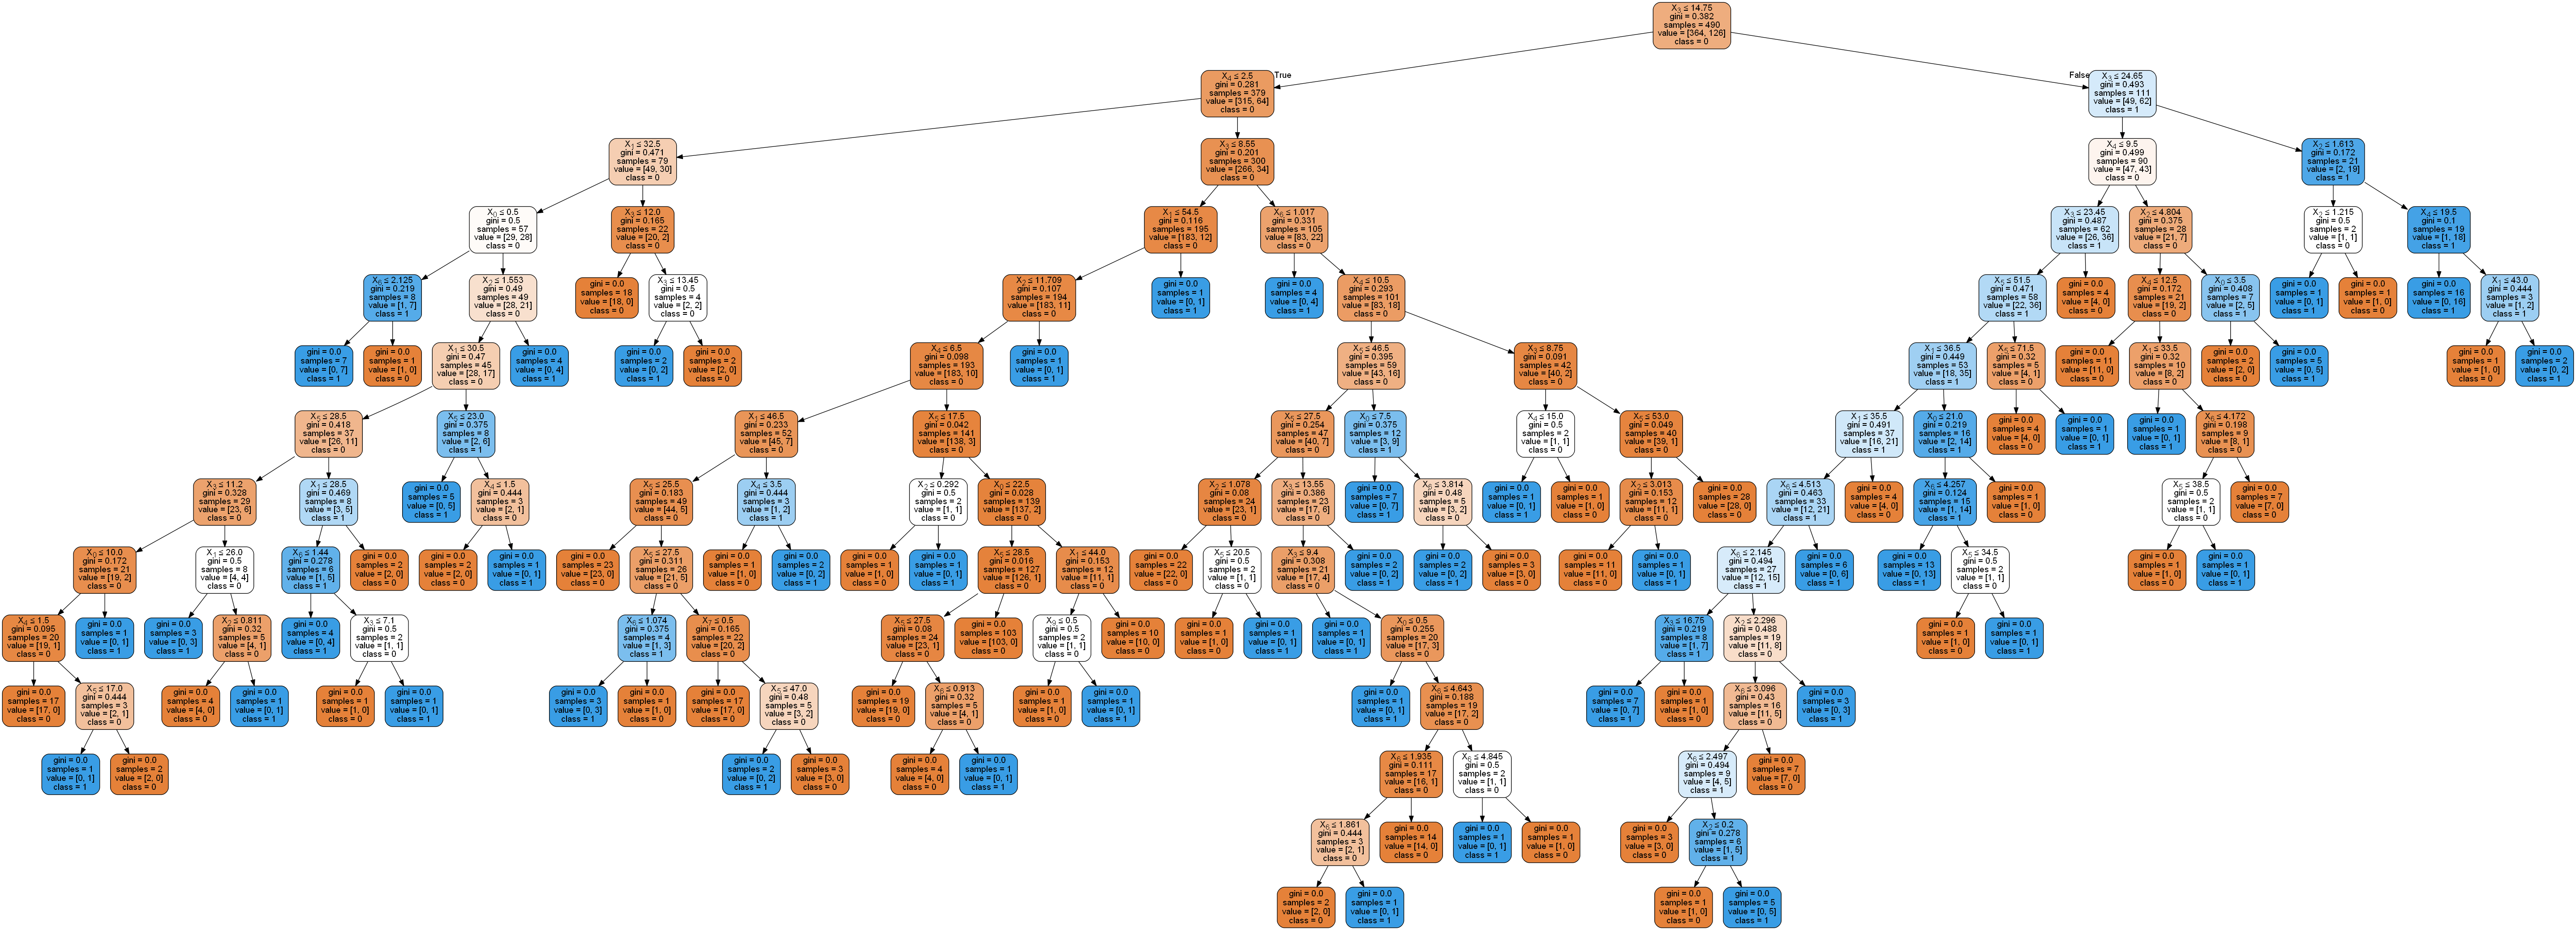

In [537]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('classification.png')
Image(graph.create_png())


# Implement Random Forest

In [543]:
import math
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import numpy as np
import random

class RandomForest:
    def __init__(self,trees_n):
        self.trees_n=trees_n #trees numbers
        self.n_features=int(math.sqrt(len(data.columns)))#feature numbers
        
    #randomly get n columns
    def _get_randomcolumns(self,col_numbers, data):
        index = random.randrange(len(data.columns))
        random_cols=[]

        while (len(random_cols)<col_numbers):
            index = random.randrange(len(data.columns))
            if index not in random_cols:
                random_cols.append(index)
        return random_cols
    
    
    def _get_data_x(self,data, col_index):
        
        data_x=pd.DataFrame()
     
        if (len(col_index)==0):
            random_cols=self._get_randomcolumns(n_features, data)
        else:
            random_cols=col_index #for test data
            
        for index in random_cols:
            data_x[data.columns[index]]=data.iloc[:,index]
        
       
            
        return random_cols,data_x
    
    
    def fit(self,data, y,):


        self.fit_list=[]
        clf_list_s=[]
        self.clf_list=[]

        clf_list_s = [DecisionTreeClassifier(max_depth=5) for i in range(self.trees_n)]

       
        for clf in clf_list_s:

            random_cols,data_x=self._get_data_x(data,[])


            self.fit_list.append([clf.fit(data_x,y),random_cols])
            self.clf_list.append([clf,random_cols])


#           text_representation = tree.export_text(clf)
#           print('\n\n')
#           print(text_representation)

    def predict(self,data_pred):          

        self.pred_res_all=[]
        

        for clf,col_index in self.clf_list:

            random_cols,data_x_pred=self._get_data_x(data_pred,col_index)

            self.pred_res_all.append(clf.predict(data_x_pred))
            
        #list pred_res_all to dataframe for calc mode and visualization   
        self.pred=pd.DataFrame()
        
        i=0

        for p in self.pred_res_all:
            i+=1
            col_name='tree '+str(i)
            self.pred[col_name]=p

        pred_res=self.pred.mode(axis=1)     
                    
        return pred_res
        
        
    def predict_visualization(self):
            
#        print(self.pred)
        
        return self.pred
    
    def score(self,pred, actual_y):
        
#         cmtr=np.array([[0,0],[0,0]])
#         print(zip(pred,  actual_y))
        
#         for pred, exp in zip(pred,  actual_y):
#             cmtr[pred][exp] += 1
        
#         cmtr=cmtr.transpose()
        
        return confusion_matrix(pred, actual_y)

In [544]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data, y, test_size=0.2, random_state=2)


In [546]:
rf=RandomForest(5)
t=rf.fit(x_train,y_train)
z=rf.predict(x_test)
d=rf.predict_visualization()
w=rf.score(z,y_test)

In [549]:
w

array([[101,  39],
       [  0,   0]], dtype=int64)

In [548]:
d

,tree 1,tree 2,tree 3,tree 4,tree 5
0,0,0,0,0,1
1,0,0,0,0,0
2,0,0,0,0,0
3,0,1,0,1,0
4,0,0,0,0,0
...,...,...,...,...,...
135,0,0,1,1,0
136,0,0,0,0,0
137,0,0,0,1,0
138,0,0,0,0,0


In [526]:
len(z), len(y_test)

(140, 140)

In [528]:
z, y_test

(     0
 0    1
 1    0
 2    0
 3    0
 4    0
 ..  ..
 135  1
 136  0
 137  0
 138  0
 139  0
 
 [140 rows x 1 columns],
 457    0
 345    1
 204    0
 583    1
 180    0
       ..
 65     1
 72     0
 343    1
 356    1
 113    0
 Name: default, Length: 140, dtype: int64)